In [874]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import copy

In [875]:
exchange_rate_2 = 0.9
exchange_rate_3 = 1.1
exchange_rate_4 = 0.8
exchange_rate_5 = 1.2

In [876]:
def generate_data(n, baseline):

    positions = np.zeros((n,2))
    positions[0,0] = baseline
    positions[0,1] = random.randint(1,5)
    for i in range(n-1):
        positions[i+1,0] = random.randint(-10,10)
        positions[i+1,1] = random.randint(1,5)
    
    print(positions)
    return positions

In [877]:
def settlementrisk(position):

    total = 0
    temp = position[0].copy()

    if position[1] == 2:
        temp *= exchange_rate_2
    elif position[1] == 3:
        temp *= exchange_rate_3
    elif position[1] == 4:
        temp *= exchange_rate_4
    elif position[1] == 5:
        temp *= exchange_rate_5
    
    return max(0, float(temp))

In [878]:
def BruteForce(positions):

    bf_list = []
    netting_1 = np.zeros((0,2))
    netting_2 = np.zeros((0,2))
    netting_3 = np.zeros((0,2))
    netting_4 = np.zeros((0,2))
    netting_5 = np.zeros((0,2))

    for i in range(len(positions)):

        if positions[i,1] == 1:
            row = copy.deepcopy(positions[i,:])
            netting_1 = np.vstack([netting_1, row])
        elif positions[i,1] == 2:
            row = copy.deepcopy(positions[i,:])
            netting_2 = np.vstack([netting_2, row])
        elif positions[i,1] == 3:
            row = copy.deepcopy(positions[i,:])
            netting_3 = np.vstack([netting_3, row])
        elif positions[i,1] == 4:
            row = copy.deepcopy(positions[i,:])
            netting_4 = np.vstack([netting_4, row])
        elif positions[i,1] == 5:
            row = copy.deepcopy(positions[i,:])
            netting_5 = np.vstack([netting_5, row])

        bf_list.append(settlementrisk(np.array([np.sum(netting_1[:,0]), 1])) + settlementrisk(np.array([np.sum(netting_2[:,0]), 2])) + settlementrisk(np.array([np.sum(netting_3[:,0]), 3])) + settlementrisk(np.array([np.sum(netting_4[:,0]), 4])) + settlementrisk(np.array([np.sum(netting_5[:,0]), 5])))

    total = settlementrisk(np.array([np.sum(netting_1[:,0]), 1])) + settlementrisk(np.array([np.sum(netting_2[:,0]), 2])) + settlementrisk(np.array([np.sum(netting_3[:,0]), 3])) + settlementrisk(np.array([np.sum(netting_4[:,0]), 4])) + settlementrisk(np.array([np.sum(netting_5[:,0]), 5]))

    return [total, bf_list]

In [879]:
def Linearisation(positions):

    lin_list = []
    baseline = copy.deepcopy(positions[0,:])
    baseline_exposure = settlementrisk(baseline)
    total = baseline_exposure
    lin_list.append(total)
    
    for i in range(len(positions) - 1):

        row = copy.deepcopy(positions[i+1,:])

        if baseline[1] == row[1]:

            temp_netting = np.array([0,0])
            temp_netting = np.vstack([temp_netting, baseline])
            temp_netting = np.vstack([temp_netting, row])

            sum = np.sum(temp_netting[:,0])
            calc = settlementrisk(np.array([sum, baseline[1]]))
            total += calc - baseline_exposure
        else:
            total += settlementrisk(row)
        
        lin_list.append(total)
        
    return [total, lin_list]

In [880]:
def Conservative(positions):

    total = 0

    cons_list = []

    for i in range(len(positions)):
        row = copy.deepcopy(positions[i,:])
        total += settlementrisk(row)
        cons_list.append(total)

    return [total, cons_list]

In [881]:
def Averages(positions):

    avg_list = []
    n = len(positions)-1
    baseline = copy.deepcopy(positions[0,:])
    baseline_exposure = settlementrisk(baseline)
    total = baseline_exposure
    avg_list.append(total)

    for i in range(len(positions)-1):

        row = copy.deepcopy(positions[i+1,:])

        if baseline[1] == row[1]:
            
            temp_netting = np.array([0,0])
            temp_netting = np.vstack([temp_netting, baseline])
            temp_netting = np.vstack([temp_netting, row])
            temp_netting[2,0] *= n

            total += 1/n*(settlementrisk(np.array([np.sum(temp_netting[:,0]), baseline[1]])) - baseline_exposure)
        
        else:
            row[0] *= n
            total += 1/n*settlementrisk(row)
        
        avg_list.append(total)

    return [total, avg_list]

[[ 5.  1.]
 [ 9.  1.]
 [-8.  3.]
 [-7.  1.]
 [-5.  2.]
 [ 1.  4.]
 [-6.  5.]
 [-4.  2.]
 [ 4.  3.]
 [ 4.  4.]
 [-3.  5.]
 [-6.  5.]
 [-4.  5.]
 [-1.  2.]
 [-1.  1.]
 [ 1.  2.]
 [ 7.  4.]
 [-2.  3.]
 [-9.  2.]
 [ 1.  5.]]
Brute Force:  15.600000000000001


Linearisation:  24.1


Conservative:  30.1


Averages:  29.573684210526313


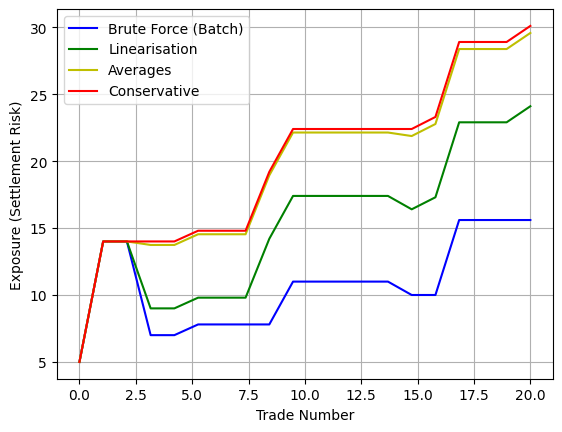

In [882]:
def sim(n, baseline):

    data = generate_data(n, baseline)

    [total_BF, bf_list] = BruteForce(data)

    [total_Linearisation, lin_list] = Linearisation(data)

    [total_Conservative, cons_list] = Conservative(data)

    [total_Averages, avg_list] = Averages(data)

    print("Brute Force: ", total_BF)
    print("\n")
    print("Linearisation: ", total_Linearisation)
    print("\n")
    print("Conservative: ", total_Conservative)
    print("\n")
    print("Averages: ", total_Averages)


    x = np.linspace(0,n,n)

    plt.figure()
    plt.plot(x,bf_list, label="Brute Force (Batch)", color= "b")
    plt.plot(x,lin_list, label="Linearisation", color= "g")
    plt.plot(x,avg_list, label="Averages", color= "y")
    plt.plot(x,cons_list, label="Conservative", color= "r")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Trade Number")
    plt.ylabel("Exposure (Settlement Risk)")
    plt.show()

sim(20, 5)

In [883]:
widgets.interact(sim,
         n = widgets.IntSlider(min=0,max=100,step=1,value=20,description="Total No. Trades"),
         baseline = widgets.IntSlider(min=10,max=500,step=5,value=100,description="Baseline Exp."),
         )

interactive(children=(IntSlider(value=20, description='Total No. Trades'), IntSlider(value=100, description='B…

<function __main__.sim(n, baseline)>